ATLANTA COMMUNITY FOOD BANK

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv("C:/Users/zeipe/OneDrive/Desktop/AIDL/Atlanta_Community_Food_Bank.csv")

In [3]:
# print(df.head())
# print(df.columns)
postInfo = df['post_body_text']
postInfo.head()

0    RT @FCSSocialWork: Giving back to the communit...
1    Giving back to the community one meal at a tim...
2    The Minnie Bell and Annie Lois Foundation Inc ...
3    The GCSO Community Affairs Unit has joined the...
4    This Black History Month remember that human t...
Name: post_body_text, dtype: object

ONE POSITIVE EXAMPLE
"We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"

In [4]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.9523


In [5]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "government"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.0


GETTING SENTIMENT SCORE FOR THE ENTIRE FILE (LINE PER LINE) AND SAVING IT TO A NEW CSV

In [6]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Read the CSV file
input_csv = 'C:/Users/zeipe/OneDrive/Desktop/AIDL/Atlanta_Community_Food_Bank.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv)

# Apply the sentiment analysis to each line in the 'post_body_text' column
df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

# Verify the contents of the DataFrame
print(df.head())

# Write the results to a new CSV file
output_csv = 'C:/Users/zeipe/OneDrive/Desktop/QTM151/qtm151spring2025/output_with_sentiment.csv'  # Replace with your desired output CSV file path
df.to_csv(output_csv, index=False)

# Confirm the file was written
print(f"Output file saved to: {output_csv}")

      PostId                                            PostUrl  \
0  434449033  https://twitter.com/FultonCoSchools/status/188...   
1  434449049  https://twitter.com/FCSSocialWork/status/18889...   
2  430920425  https://www.facebook.com/minannfoundation/post...   
3  428970310  https://twitter.com/GwinnettSO/status/18864363...   
4  428601969  https://www.facebook.com/QasimRashid/posts/pfb...   

   PostEngagement  Platform  ChannelID  \
0             NaN   Twitter   10680015   
1             NaN   Twitter   19190889   
2             NaN  Facebook   31907123   
3             NaN   Twitter   10669078   
4             NaN  Facebook    5048701   

                                     ChannelName     ChannelUid  \
0                            FultonCountySchools  blank_for_now   
1                                  FCSSocialWork  blank_for_now   
2  The Minnie Bell and Annie Lois Foundation Inc  blank_for_now   
3               Gwinnett County Sheriff's Office  blank_for_now   
4        

GETTING A SUMMARIZED SENTIMENT SCORE FOR THE ENTIRE CSV, OTHER DESCRIPTIVE DATA?

Some basic visualizations

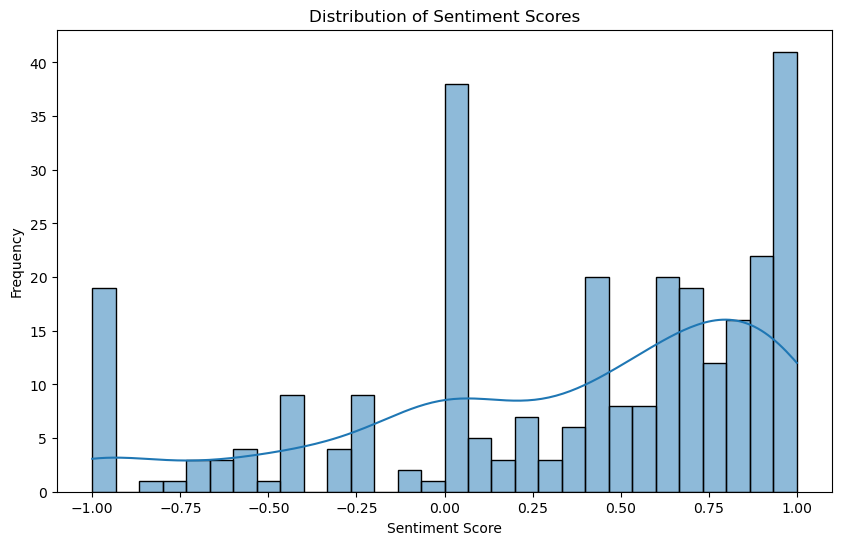

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/zeipe/OneDrive/Desktop/QTM151/qtm151spring2025/output_with_sentiment.csv')

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('C:/Users/zeipe/OneDrive/Desktop/QTM151/qtm151spring2025/output_with_sentiment.csv')

# Group by 'Platform' and calculate the average sentiment score for each platform
average_sentiment = df.groupby('Platform')['sentiment'].mean().reset_index()

# Rename columns for clarity
average_sentiment.columns = ['Platform', 'AverageSentimentScore']

print(average_sentiment)


          Platform  AverageSentimentScore
0         Facebook               0.519306
1   FacebookDirect               0.687200
2        Instagram               0.725229
3  InstagramDirect               0.619503
4          Podcast               0.870000
5           Rumble              -0.618800
6         Telegram              -0.421500
7           TikTok              -0.223900
8          Twitter               0.260506
9          YouTube               0.307643
